In [1]:
import numpy as np
from scipy.stats import norm
from scipy.optimize import minimize_scalar   
import pandas as pd
import pandas_datareader.data as web
import datetime as dt
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm
import requests
import responses
import requests

In [2]:
N = norm.cdf

def BS_CALL(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * N(d1) - K * np.exp(-r*T)* N(d2)

def BS_PUT(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma* np.sqrt(T)
    return K*np.exp(-r*T)*N(-d2) - S*N(-d1)    
    

def implied_vol(opt_value, S, K, T, r, type_='call'):
    
    def call_obj(sigma):
        return abs(BS_CALL(S, K, T, r, sigma) - opt_value)
    
    def put_obj(sigma):
        return abs(BS_PUT(S, K, T, r, sigma) - opt_value)
    
    if type_ == 'call':
        res = minimize_scalar(call_obj, bounds=(0.01,6), method='bounded')
        return res.x
    elif type_ == 'put':
        res = minimize_scalar(put_obj, bounds=(0.01,6),
                              method='bounded')
        return res.x
    else:
        raise ValueError("type_ must be 'put' or 'call'")

In [3]:
#StarBucks Data
calls = pd.read_csv('Options.csv')
calls = calls.head(31)
calls

,Symbol,Symbol.1,Strike,Moneyness,Bid,Midpoint,Ask,Last,Change,%Chg,Volume,Open Int,Vol/OI,IV,Type,DTE,Exp Date,Last Trade,Avg IV,30D His Vol
0,SBUX|20220311|65.00C,SBUX,65.0,+33.32%,32.50,32.83,33.15,0.00,0.00,unch,0.0,0,0.00,68.01%,Call,30.0,03/11/22,NaN,22.83%,23.14%
1,SBUX|20220311|70.00C,SBUX,70.0,+28.19%,27.50,27.80,28.10,0.00,0.00,unch,0.0,0,0.00,53.47%,Call,30.0,03/11/22,NaN,22.83%,23.14%
2,SBUX|20220311|75.00C,SBUX,75.0,+23.06%,22.55,22.95,23.35,0.00,0.00,unch,0.0,0,0.00,54.66%,Call,30.0,03/11/22,NaN,22.83%,23.14%
3,SBUX|20220311|80.00C,SBUX,80.0,+17.93%,17.60,17.98,18.35,0.00,0.00,unch,0.0,0,0.00,44.45%,Call,30.0,03/11/22,NaN,22.83%,23.14%
4,SBUX|20220311|85.00C,SBUX,85.0,+12.80%,12.60,13.00,13.40,0.00,0.00,unch,0.0,0,0.00,34.15%,Call,30.0,03/11/22,NaN,22.83%,23.14%
5,SBUX|20220311|90.00C,SBUX,90.0,+7.67%,7.90,8.13,8.35,0.00,0.00,unch,0.0,0,0.00,25.42%,Call,30.0,03/11/22,NaN,22.83%,23.14%
6,SBUX|20220311|91.00C,SBUX,91.0,+6.65%,7.10,7.28,7.45,6.77,0.72,+11.90%,1.0,0,0.00,25.41%,Call,30.0,03/11/22,09:33 ET,22.83%,23.14%
7,SBUX|20220311|92.00C,SBUX,92.0,+5.62%,6.25,6.43,6.60,0.00,0.00,unch,0.0,0,0.00,24.87%,Call,30.0,03/11/22,NaN,22.83%,23.14%
8,SBUX|20220311|93.00C,SBUX,93.0,+4.60%,5.45,5.60,5.75,4.15,0.00,unch,0.0,0,0.00,24.21%,Call,30.0,03/11/22,02/07/22,22.83%,23.14%
9,SBUX|20220311|94.00C,SBUX,94.0,+3.57%,4.65,4.83,5.00,2.94,0.00,unch,0.0,0,0.00,23.69%,Call,30.0,03/11/22,02/08/22,22.83%,23.14%


In [4]:
strike = calls["Strike"]
IV = calls["IV"]
Spot = (calls["Bid"] + calls["Ask"])/2

In [5]:
calls['IV'] = calls['IV'].str.strip('%')
IV = calls['IV']
IV = IV.tolist()
strike = strike.tolist()
Spot = Spot.tolist()

In [6]:
IV = [float(i) for i in IV]
IV = [x / 100.0 for x in IV]

In [7]:
T = np.arange(0,0.65,0.021)
T

array([0.   , 0.021, 0.042, 0.063, 0.084, 0.105, 0.126, 0.147, 0.168,
       0.189, 0.21 , 0.231, 0.252, 0.273, 0.294, 0.315, 0.336, 0.357,
       0.378, 0.399, 0.42 , 0.441, 0.462, 0.483, 0.504, 0.525, 0.546,
       0.567, 0.588, 0.609, 0.63 ])

In [26]:
C_IV = []
for i in range(len(T)):
    C_IV.append(BS_CALL(Spot[i], strike[i], T[i], 0.01, IV[i]))
ivs = []
for i in range(len(T)):
    iv = implied_vol(C[i], Spot[i], strike[i], 1, 0.01)
    ivs.append(iv)

C:\Users\affan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


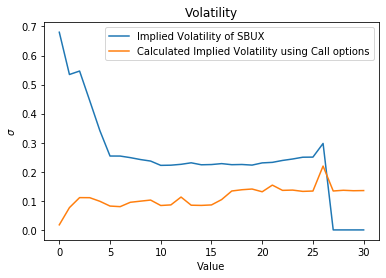

In [27]:
plt.plot(IV,label='Implied Volatility of SBUX')
plt.plot(ivs,label='Calculated Implied Volatility using Call options')
plt.xlabel('Value')
plt.ylabel('$\sigma$')
plt.title('Volatility')
plt.legend()
plt.show()


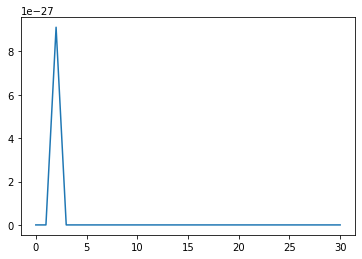

In [20]:
plt.plot(C_IV,label='Calculated Implied Volatility using Call options')

C:\Users\affan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


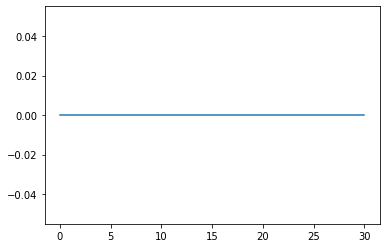

In [28]:
C_ivs = []
for i in range(len(T)):
    C_ivs.append(BS_CALL(Spot[i], strike[i], T[i], 1, ivs[i]))

plt.plot(C_ivs,label='Calculated Implied Volatility using Call option')

In [25]:
ivs

[0.01749009106454906,
 0.07667112569758976,
 0.1111267012809012,
 0.11087615902486926,
 0.09849503151042895,
 0.08206521337045475,
 0.08006530318668177,
 0.0950489832615036,
 0.0989362512331021,
 0.10271092319643729,
 0.08401371290278875,
 0.08607313265649941,
 0.1130610170341057,
 0.08500746396359514,
 0.08433895759930465,
 0.08595997349502418,
 0.10434890090583179,
 0.1338916582650966,
 0.13822078307410327,
 0.14069806169174978,
 0.13121995442873982,
 0.15417970250078364,
 0.13605569415099913,
 0.13704012748220587,
 0.1325669767298864,
 0.13377428292559837,
 0.21968733413602096,
 0.1339324868327336,
 0.13637973413586987,
 0.13484370915366317,
 0.1353803507689382]

In [17]:
import yfinance as yf
aapl = yf.Ticker("AAPL")

In [20]:
aapl.options

('2022-03-04',
 '2022-03-11',
 '2022-03-18',
 '2022-03-25',
 '2022-04-01',
 '2022-04-08',
 '2022-04-14',
 '2022-05-20',
 '2022-06-17',
 '2022-07-15',
 '2022-08-19',
 '2022-09-16',
 '2022-10-21',
 '2022-11-18',
 '2023-01-20',
 '2023-03-17',
 '2023-06-16',
 '2023-09-15',
 '2024-01-19')

In [24]:
opt = aapl.option_chain('2022-03-04')

In [29]:
nfcalls = opt.calls
nfcalls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   contractSymbol     47 non-null     object             
 1   lastTradeDate      47 non-null     datetime64[ns, UTC]
 2   strike             47 non-null     float64            
 3   lastPrice          47 non-null     float64            
 4   bid                47 non-null     float64            
 5   ask                47 non-null     float64            
 6   change             47 non-null     float64            
 7   percentChange      47 non-null     float64            
 8   volume             47 non-null     int64              
 9   openInterest       47 non-null     int64              
 10  impliedVolatility  47 non-null     float64            
 11  inTheMoney         47 non-null     bool               
 12  contractSize       47 non-null     object           